# Problem Statement

### For Text Mining assignment

### 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

### 2) Perform emotion mining

In [24]:
import pandas as pd
import seaborn as sns
df=pd.read_csv(r'Elon_musk.csv',encoding='latin1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [25]:
df.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [26]:
tweets=df.drop('Unnamed: 0',axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [27]:
import nltk
import re 
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sandip/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Text Preprocessing

In [28]:
from nltk.stem import WordNetLemmatizer
lmtz=WordNetLemmatizer()
corpus=[]
for i in range(len(tweets)):
    txt=re.sub('[^a-zA-Z]',' ',tweets['Text'][i])
    txt=txt.lower()
    txt=txt.split()
    txt=[lmtz.lemmatize(word) for word in txt if not word in set(stopwords.words('english'))]
    txt=' '.join(txt)
    corpus.append(txt)

In [29]:
corpus

['kunalb alien',
 'id aa carmack ray tracing cyberpunk hdr next level tried',
 'joerogan spotify great interview',
 'gtera doge underestimated',
 'teslacn congratulation tesla china amazing execution last year next even',
 'happy new year ox http co wfkmyu oj',
 'frodo underdoge thought would fail http co zgxjfdzzrm',
 'owensparks flcnhvy anonyx haha thanks',
 'flcnhvy anonyx indeed tweet definitely represent real world time allocation',
 'entertaining outcome likely',
 'givedirectly sent',
 'agree clubhouse kanyewest',
 'http co rwe uhsts',
 'geoffkeighley unrealengine getting real',
 'bought dogecoin lil x toddler hodler',
 'joshmanmode definitely issue sentencing seems bit high',
 'freewalletorg thanks fixing',
 'freewalletorg please unlock account',
 'astrojordy u f u f',
 'true power haha http co fc uhqsd',
 'freewalletorg crypto wallet give private key avoided cost',
 'freewalletorg app suck',
 'rt spacex nasa selected falcon heavy launch first two element lunar gateway together 

# Text Mining N Visualization

In [30]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
from spacy import displacy
import spacy

In [32]:
nlp=spacy.load('en_core_web_sm')

In [33]:
txt=' '.join(df['Text'])
x=nlp(txt)

In [34]:
displacy.render(x,style='ent')

In [35]:
for i in x:
    print(i,i.pos)

@kunalb11 96
Im 100
an 90
alien 84
@ID_AA_Carmack 86
Ray 96
tracing 100
on 85
Cyberpunk 96
with 85
HDR 96
is 87
next 84
- 97
level 92
. 97
Have 87
you 95
tried 100
it 95
? 97
@joerogan 96
@Spotify 100
Great 84
interview 92
! 97
@gtera27 96
Doge 96
is 87
underestimated 100
@teslacn 96
Congratulations 96
Tesla 96
China 96
for 85
amazing 84
execution 92
last 84
year 92
. 97
Now 86
on 85
to 85
the 90
next 84
for 85
even 86
more 84
! 97
! 97
Happy 96
New 96
Year 96
of 85
the 90
Ox 96
! 96
https://t.co/9WFKMYu2oj 96
Frodo 96
was 87
the 90
underdoge 84
, 97

 103
All 95
thought 100
he 95
would 87
fail 100
, 97

 103
Himself 95
most 84
of 85
all 95
. 97
https://t.co/zGxJFDzzrM 96
@OwenSparks 101
_ 97
@flcnhvy 96
@anonyx10 96
Haha 96
thanks 92
:) 97
@flcnhvy 96
@anonyx10 96
Indeed 86
! 97
Tweets 92
definitely 86
do 87
not 94
represent 100
real 84
- 97
world 92
time 92
allocation 92
. 97
The 90
most 86
entertaining 84
outcome 92
is 87
the 90
most 86
likely 84
@GiveDirectly 86
Just 86
sent 100
s

In [36]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt


(-0.5, 399.5, 199.5, -0.5)

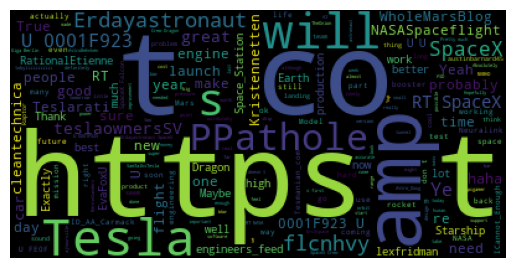

In [37]:
stop=STOPWORDS
wc=WordCloud(background_color='black',stopwords=stop).generate(txt)
plt.imshow(wc)
plt.axis('off')

# Sentiment analysis using TextBlob

In [38]:
from textblob import TextBlob

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    label=[]
    for i in text:
        analysis = TextBlob(i)
        if analysis.sentiment.polarity > 0:
            label.append(1)
        elif analysis.sentiment.polarity == 0:
            label.append(0)
        else:
            label.append(-1)
    return label

# Example usage:
tweet = "I love SpaceX and Tesla!"
sentiment = analyze_sentiment(corpus)
print("Sentiment:", sentiment)


Sentiment: [-1, 0, 1, 0, 1, 1, -1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, -1, -1, 0, 0, 0, 0, 0, -1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, -1, 0, 0, 1, 0, 0, 1, -1, 1, 1, 1, -1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, -1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, -1, 1, 1, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 1, -1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 1, 1, -1, 1, 1, 1, 0, 1, 0, 1, 1, -1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, -1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, -1, 0, 1, 1, 1, 0, -1, 1, 1, 0, 1, 0, 1, -1, 1, -1, 0, 1, 0, 0, -1, -1, -1, 1, 0, 0, 0, 0, -1, 0, 

In [39]:
tweets['Sentiment']=sentiment
tweets

,Text,Sentiment
0,@kunalb11 Im an alien,-1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,1
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,1
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",1
1995,@PPathole Make sure to read ur terms &amp; con...,1
1996,@TeslaGong @PPathole Samwise Gamgee,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,-1


In [40]:
tweets.replace({-1:'negative',1:'positive',0:'neutral'},inplace=True)

In [41]:
tweets.replace({'psitive':'positive'},inplace=True)

In [42]:
tweets

,Text,Sentiment
0,@kunalb11 Im an alien,negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,neutral
2,@joerogan @Spotify Great interview!,positive
3,@gtera27 Doge is underestimated,neutral
4,@teslacn Congratulations Tesla China for amazi...,positive
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",positive
1995,@PPathole Make sure to read ur terms &amp; con...,positive
1996,@TeslaGong @PPathole Samwise Gamgee,neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,negative


<Axes: >

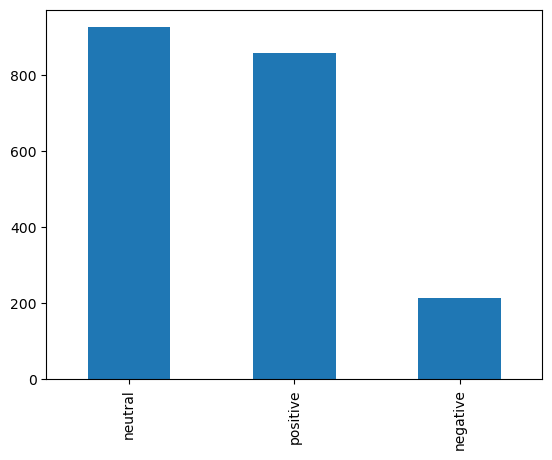

In [43]:
tweets['Sentiment'].value_counts().plot(kind='bar')

/var/folders/dt/ty2ltnkd5bl9j772y8m9kqp00000gn/T/ipykernel_5703/1924043631.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tweets['Sentiment'].value_counts())


<Axes: xlabel='Sentiment', ylabel='Density'>

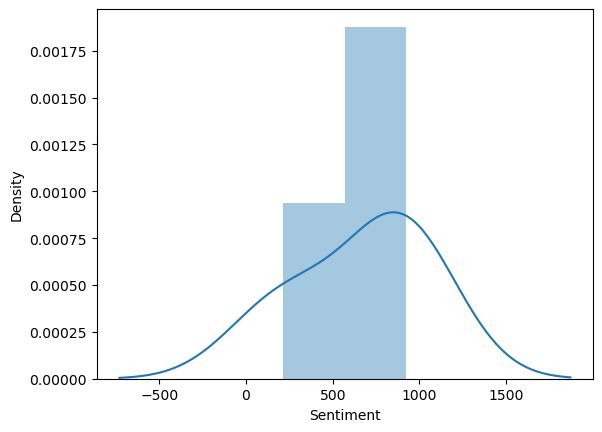

In [44]:
sns.distplot(tweets['Sentiment'].value_counts())

### POsitive tweets

In [45]:
tweets[tweets['Sentiment']=='positive']

,Text,Sentiment
2,@joerogan @Spotify Great interview!,positive
4,@teslacn Congratulations Tesla China for amazi...,positive
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,positive
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),positive
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,positive
...,...,...
1986,Best use of the term Full Stack?,positive
1987,@PPathole @IheartTesla For sure. This is both ...,positive
1991,@IheartTesla No easy way to answer this in a t...,positive
1994,"@flcnhvy True, it sounds so surreal, but the n...",positive


## Negative tweets

In [46]:
tweets[tweets['Sentiment']=='negative']

,Text,Sentiment
0,@kunalb11 Im an alien,negative
6,"Frodo was the underdoge,\nAll thought he would...",negative
25,@RationalEtienne @Adamklotz_ Starlink is a sta...,negative
26,@RationalEtienne @Adamklotz_ SpaceX needs to p...,negative
32,@SRuhle Everyone at Tesla receives stock. \n\n...,negative
...,...,...
1943,@teslaownersSV @engineers_feed The strength &a...,negative
1949,@katlinegrey Reusability is essential. A rocke...,negative
1958,@jgrano305 @TeslaratiTeam @Teslarati We have r...,negative
1989,"@buzzindelhi Sorry, should hopefully be soon!",negative


## Neutral tweets

In [47]:
tweets[tweets['Sentiment']=='neutral']

,Text,Sentiment
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,neutral
3,@gtera27 Doge is underestimated,neutral
10,@GiveDirectly Just sent some,neutral
11,Just agree to do Clubhouse with @kanyewest,neutral
12,https://t.co/3rWE9uHSTS,neutral
...,...,...
1990,"@kenyanwalstreet Not actually a payout, just a...",neutral
1992,AI symbiosis while u wait,neutral
1993,@vistacruiser7 @flcnhvy Theres some of that too,neutral
1996,@TeslaGong @PPathole Samwise Gamgee,neutral


# Emotion Analysis using nrclex

In [51]:
from nrclex import NRCLex

# Function to perform emotion analysis on a list of sentences using NRCLex
def analyze_emotion_list(sentences):
    emotions_list = []
    for sentence in sentences:
        emotion = NRCLex(sentence)
        emotions_list.append(emotion.top_emotions[0][0])
    return emotions_list







In [52]:
# Example usage:
emotions = analyze_emotion_list(corpus)
print("Emotions for each sentence:", emotions)

Emotions for each sentence: ['fear', 'trust', 'fear', 'fear', 'fear', 'trust', 'anticipation', 'fear', 'trust', 'positive', 'fear', 'positive', 'fear', 'trust', 'fear', 'fear', 'fear', 'trust', 'fear', 'trust', 'fear', 'negative', 'trust', 'fear', 'positive', 'fear', 'fear', 'negative', 'negative', 'positive', 'fear', 'trust', 'fear', 'fear', 'fear', 'trust', 'fear', 'positive', 'fear', 'fear', 'fear', 'positive', 'negative', 'fear', 'fear', 'trust', 'positive', 'positive', 'fear', 'fear', 'trust', 'fear', 'fear', 'fear', 'trust', 'negative', 'anticipation', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'positive', 'positive', 'anger', 'fear', 'anticipation', 'fear', 'anticipation', 'positive', 'trust', 'fear', 'negative', 'fear', 'positive', 'fear', 'anticipation', 'positive', 'negative', 'positive', 'fear', 'fear', 'fear', 'fear', 'fear', 'positive', 'fear', 'fear', 'positive', 'negative', 'anticipation', 'fear', 'surp

In [53]:
tweets['Emotion']=emotions
tweets

,Text,Sentiment,Emotion
0,@kunalb11 Im an alien,negative,fear
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,neutral,trust
2,@joerogan @Spotify Great interview!,positive,fear
3,@gtera27 Doge is underestimated,neutral,fear
4,@teslacn Congratulations Tesla China for amazi...,positive,fear
...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",positive,negative
1995,@PPathole Make sure to read ur terms &amp; con...,positive,fear
1996,@TeslaGong @PPathole Samwise Gamgee,neutral,fear
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,negative,negative


# Count of the Emotions

In [54]:
tweets['Emotion'].value_counts()

fear            1018
positive         385
trust            306
negative         129
anticipation      84
anger             48
surprise          23
sadness            3
disgust            3
Name: Emotion, dtype: int64

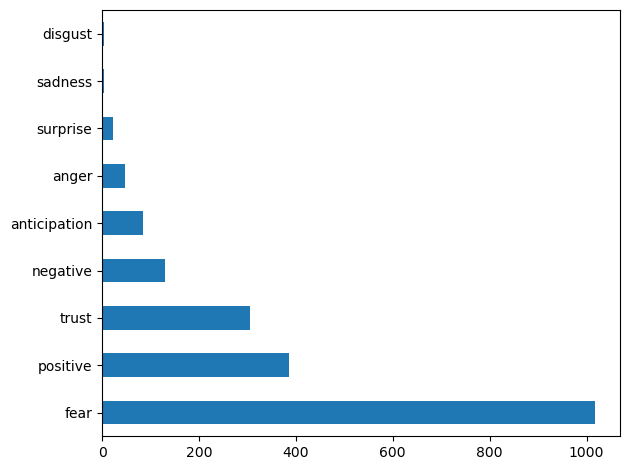

In [55]:
tweets['Emotion'].value_counts().plot(kind='barh')
plt.tight_layout()

/var/folders/dt/ty2ltnkd5bl9j772y8m9kqp00000gn/T/ipykernel_5703/1488079694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tweets['Emotion'].value_counts())


<Axes: xlabel='Emotion', ylabel='Density'>

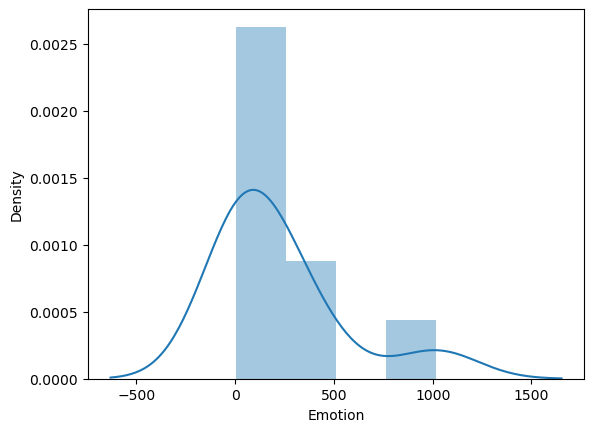

In [56]:
sns.distplot(tweets['Emotion'].value_counts())